In [2]:
# Importing comet_ml
import comet_ml
from comet_ml import Experiment
#from comet_ml.integration.pytorch import log_model

# Creating an experiment with api key

experiment = Experiment(
  api_key = "Z3zS1quxrC1NIIK61rNNhVKdg",
  project_name = "Language Classification",
  workspace="sorach-roshe"
)
# suppress cell warnings
import warnings
warnings.filterwarnings("ignore")

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/sorach-roshe/language-classification/6a7e53dc1040444eb19c9fabec5feb82
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: Not all initial data has been logged for experiment 6a7e53dc1040444eb19c9fabec5feb82, call Experiment.end() to ensure that all data to have been logged
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before

In [3]:
# utilities
# Importing the Libraries 
import re  # for pattern matching and manipulation of strings.
import numpy as np  # used for numerical computations and data manipulation.
import pandas as pd  # for data manipulation and analysis.
import string  # for string manipulation tasks.

# For plotting
import seaborn as sns  # for data visualization.
from wordcloud import WordCloud  # used to generate word clouds.
import matplotlib.pyplot as plt  # used for plotting data.

# nltk
from nltk.stem import WordNetLemmatizer  # used for lemmatizing words
from nltk.tokenize import TreebankWordTokenizer  # used for tokenizing sentences into words.
from nltk import SnowballStemmer  # used for stemming words.

# sklearn
from sklearn.svm import LinearSVC  # used for solving linear classification problems. 
from sklearn.naive_bayes import BernoulliNB  # implementation of the Naive Bayes algorithm.
from sklearn.linear_model import LogisticRegression  # implementation of logistic regression.  
from sklearn.model_selection import train_test_split  # for splitting a dataset into training and testing subsets.
from sklearn.feature_extraction.text import TfidfVectorizer  # for converting text documents into a numerical representation.
from sklearn.metrics import confusion_matrix, classification_report  # for evaluating the performance of a classification model
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn import preprocessing  # for data preprocessing
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
import timeit
# suppress cell warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("train_set.csv") # reads a CSV file named "train.csv" and stores it in Pandas df.
df_test = pd.read_csv("test_set.csv") # reads "test_with_no_labels.csv" and stores it in Pandas df_test.

In [5]:
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [6]:
df_test.head(20)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [8]:
np.sum(df.isnull().any(axis=1))

0

In [9]:
df.duplicated() 

0        False
1        False
2        False
3        False
4        False
         ...  
32995    False
32996     True
32997    False
32998    False
32999    False
Length: 33000, dtype: bool

In [38]:
df.drop_duplicates()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32994,eng,manuel marin s ill-fated debt sources but very...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [39]:
df.dtypes

lang_id    object
text       object
dtype: object

In [40]:
df.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [41]:
# Checking the shape of the datasets
print(f'The shape of the train dataset: {df.shape}\nThe shape of the test dataset: {df_test.shape}')

The shape of the train dataset: (33000, 2)
The shape of the test dataset: (5682, 2)


In [42]:
df['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [43]:
df['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

<AxesSubplot:xlabel='lang_id', ylabel='count'>

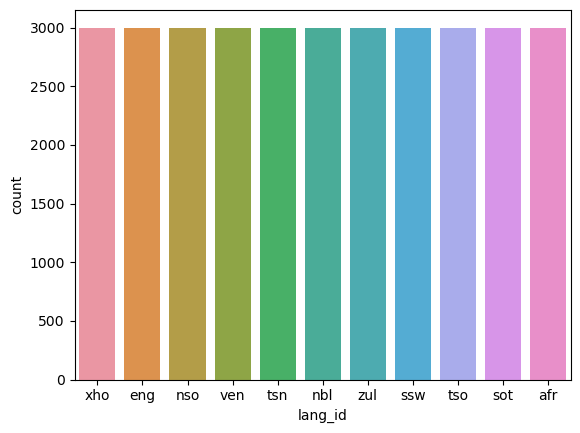

In [44]:
# To creates a countplot
sns.countplot(x='lang_id', data=df)

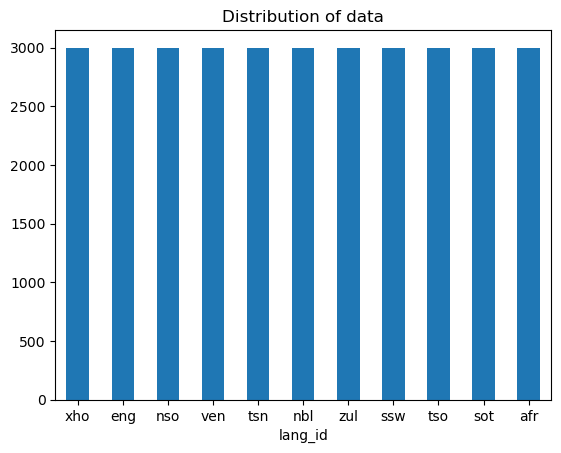

In [45]:
# Plotting the distribution for dataset.
ax = df.groupby('lang_id').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['xho','eng','nso','ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr'], rotation=0)
# Storing data in lists.
text, lang_id = list(df['text']), list(df['lang_id'])

In [46]:
 #Separating languages by number
data_1 = df[df['lang_id'] == 'xho']
data_2 = df[df['lang_id'] == 'eng']
data_3 = df[df['lang_id'] == 'nso' ]
data_4 = df[df['lang_id'] == 'ven']
data_5 = df[df['lang_id'] == 'tsn']
data_6 = df[df['lang_id'] == 'nbl']
data_7 = df[df['lang_id'] == 'zul']
data_8 = df[df['lang_id'] == 'ssw']
data_9 = df[df['lang_id'] == 'tso']
data_10 = df[df['lang_id'] == 'sot']
data_11 = df[df['lang_id'] == 'afr']

In [47]:
# Combining all
dataset = pd.concat([data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10, data_11])

In [48]:
# Change to lowercase
dataset['text']=dataset['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()
dataset['text'].tail()

32906    sodra alle krediteureise en sekwestrasiekoste ...
32910    help die rvt om doeltreffende bedryf van die f...
32919    eers nadat dié meerderheidsooreenkoms bereik i...
32968    onkruide kan hulle lewensiklus in minder as ee...
32988    armoedige huishoudings word geïdentifiseer en ...
Name: text, dtype: object

In [49]:
# remove punctuation
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [50]:
dataset['text'] = dataset['text'].apply(remove_punctuation)
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [51]:
# Tokenise
tokeniser = TreebankWordTokenizer()
dataset['tokens'] = dataset['text'].apply(tokeniser.tokenize)

In [52]:
# Lemmatization
lemmatizer = WordNetLemmatizer()

In [53]:
# Separating input feature and label
X = dataset.text
y = dataset.lang_id

In [54]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [55]:
# Transforming the Dataset Using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,3), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 3))

In [56]:
X_train_vect = vectoriser.transform(X_train)
X_test_vect = vectoriser.transform(X_test)

In [57]:
test_X = vectoriser.transform(df_test.text)

In [58]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test_vect)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

In [59]:
# Bernoulli model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_vect, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test_vect)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       610
         eng       1.00      1.00      1.00       611
         nbl       1.00      0.94      0.97       599
         nso       1.00      1.00      1.00       609
         sot       1.00      1.00      1.00       597
         ssw       1.00      0.99      1.00       607
         tsn       1.00      1.00      1.00       642
         tso       1.00      1.00      1.00       586
         ven       1.00      1.00      1.00       609
         xho       1.00      1.00      1.00       558
         zul       0.93      1.00      0.97       572

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [66]:
df_test = df_test.iloc[:len(y_pred1)]

In [61]:
y_pred1 = y_pred1[:len(df_test)]

In [67]:
results_df_bern = pd.DataFrame({'index': df_test['index'], 'lang_id': y_pred1})
results_df_bern.to_csv('results_df_bern.csv', index=False)
results_df_bern.head()

,index,lang_id
0,1,nso
1,2,nbl
2,3,afr
3,4,ven
4,5,ven


In [68]:
results_df_bern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    5682 non-null   int64 
 1   lang_id  5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [69]:
# SVC model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vect, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test_vect)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       610
         eng       1.00      1.00      1.00       611
         nbl       1.00      0.98      0.99       599
         nso       1.00      1.00      1.00       609
         sot       1.00      1.00      1.00       597
         ssw       1.00      1.00      1.00       607
         tsn       1.00      1.00      1.00       642
         tso       1.00      1.00      1.00       586
         ven       1.00      1.00      1.00       609
         xho       0.99      1.00      0.99       558
         zul       0.98      0.99      0.99       572

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [73]:
y_pred2 = y_pred1[:len(df_test)]

In [75]:
results_df_svc = pd.DataFrame({'index': df_test['index'], 'lang_id': y_pred2})
results_df_svc.to_csv('results_df_svc.csv', index=False)
results_df_svc.head()

,index,lang_id
0,1,nso
1,2,nbl
2,3,afr
3,4,ven
4,5,ven
